# Lab | Customer Analysis + prediction, evaluation

## Problem (case study)

- I will apply a linear regression machine learning model to try to predict the insurance claim amount starting from Customer Lifetime Value.

## Getting Data

In [1]:
import pandas as pd 
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
mca=pd.read_csv('marketing_customer_analysis.csv')

In [3]:
mca.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Cleaning/Wrangling/EDA

### Change headers names. Deal with NaN values, replace with appropriate method.

In [4]:
cols=[]
for i in range(len(mca.columns)):
    cols.append(mca.columns[i].lower())
mca.columns=cols
mca.columns=mca.columns.str.replace(" ", "_")
new_names={'unnamed:_0':'id'}
mca.rename(columns=new_names,inplace=True)
mca.head()

,id,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [62]:
mca.sort_values('total_claim_amount')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
3663,EY74093,Nevada,5004.135361,No,Basic,High School or Below,2011-02-21,Employed,M,86834,...,93,0.0,8,Corporate Auto,Corporate L1,Offer4,Agent,0.099007,Four-Door Car,Medsize
2778,PN21042,Arizona,4538.847818,No,Basic,Bachelor,2011-02-17,Employed,M,82297,...,62,0.0,1,Personal Auto,Personal L3,Offer1,Call Center,0.382107,Sports Car,Medsize
4091,PN21042,Arizona,4538.847818,No,Basic,Bachelor,2011-02-17,Employed,M,82297,...,62,0.0,1,Personal Auto,Personal L3,Offer1,Call Center,0.382107,Sports Car,Medsize
6197,IS30186,California,6186.497831,No,Extended,College,2011-01-31,Employed,F,88375,...,11,0.0,3,Personal Auto,Personal L2,Offer2,Agent,0.423310,Four-Door Car,Medsize
6972,IS30186,California,6186.497831,No,Extended,College,2011-01-31,Employed,F,88375,...,11,0.0,3,Personal Auto,Personal L2,Offer2,Agent,0.423310,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,UZ14076,California,32104.699570,No,Premium,High School or Below,2011-02-16,Employed,F,89546,...,18,1.0,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large
8150,IV94496,Nevada,43217.216110,No,Extended,High School or Below,2011-01-27,Employed,M,51504,...,99,0.0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Unknown,Unknown
9807,IV94496,Nevada,43217.216110,No,Extended,High School or Below,2011-01-27,Employed,M,51504,...,99,0.0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Luxury SUV,Medsize
7866,ZD75163,Nevada,9295.411150,No,Premium,High School or Below,2011-02-14,Unemployed,M,0,...,44,0.0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize


In [5]:
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [6]:
mca['effective_to_date']=pd.to_datetime(mca['effective_to_date'],errors='coerce')
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10279 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [7]:
nulls_mca=pd.DataFrame(round(mca.isna().sum()/len(mca),4)*100)

In [8]:
nulls_mca=nulls_mca.rename(columns={'index':'header',0:'prop_nulls'})

In [9]:
nulls_mca

,prop_nulls
id,0.00
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00


In [10]:
mca=mca.drop(['vehicle_type'],axis=1)
mca=mca.drop(['id'],axis=1)

In [11]:
nulls_mca=pd.DataFrame(round(mca.isna().sum()/len(mca),4)*100)
nulls_mca=nulls_mca.rename(columns={'index':'header',0:'prop_nulls'})
nulls_mca

,prop_nulls
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00
income,0.00


In [12]:
mca['state']=mca['state'].fillna("Unknown")
mca['response']=mca['response'].fillna("Unknown")
mca['vehicle_class']=mca['vehicle_class'].fillna("Unknown")
mca['vehicle_size']=mca['vehicle_size'].fillna("Unknown")

In [13]:
med_1=mca['months_since_last_claim'].median()
med_2=mca['number_of_open_complaints'].median()
mca['months_since_last_claim']=mca['months_since_last_claim'].fillna(med_1)
mca['number_of_open_complaints']=mca['number_of_open_complaints'].fillna(med_2)

In [14]:
nulls_mca=pd.DataFrame(round(mca.isna().sum()/len(mca),4)*100)
nulls_mca=nulls_mca.rename(columns={'index':'header',0:'prop_nulls'})
nulls_mca

,prop_nulls
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


### split categorical Features and Numerical Features.

In [15]:
y=mca['total_claim_amount']
X=mca.drop(['total_claim_amount'], axis=1)

In [16]:
X.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

In [17]:
X=X.drop(['customer','effective_to_date'], axis=1)

In [18]:
X.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [19]:
X_num=X.select_dtypes(include=np.number)
X_cat=X.select_dtypes(include=object)

### Explore visually both sets of features, to identify next steps.

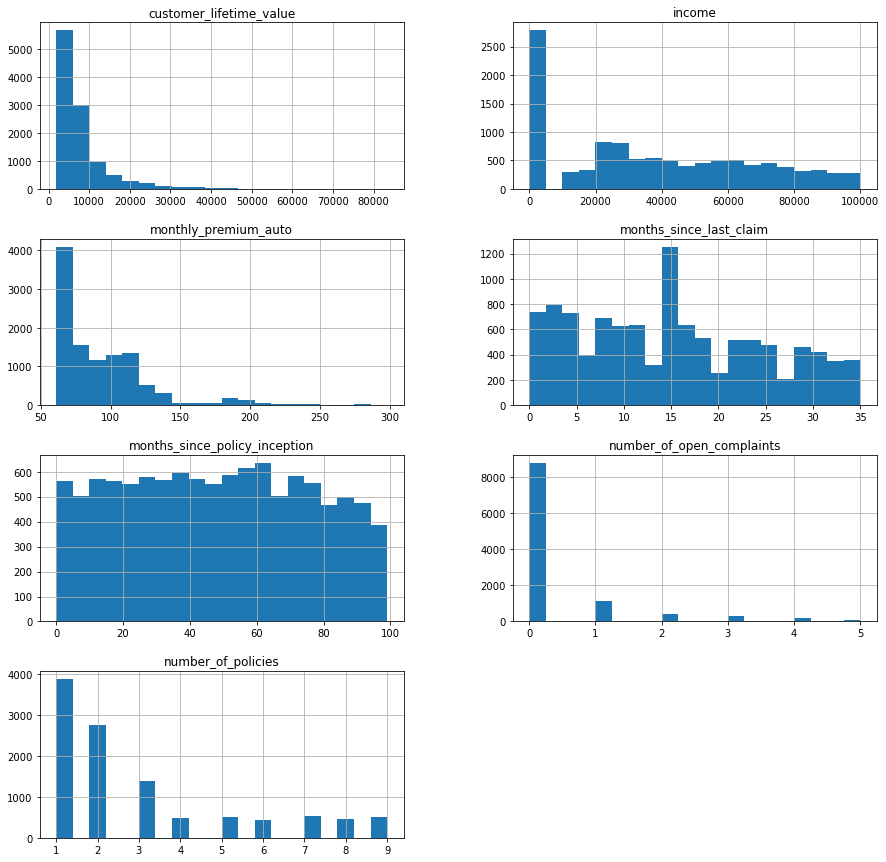

In [20]:
X_num.hist(figsize=(15,15),bins=20,layout=(4,2));

In [21]:
X_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


### Look at potential multicollinearity using a correlation matrix or other approach.

In [22]:
corre_matrix=X_num.corr()
corre_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer_lifetime_value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505
months_since_last_claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681
number_of_policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000


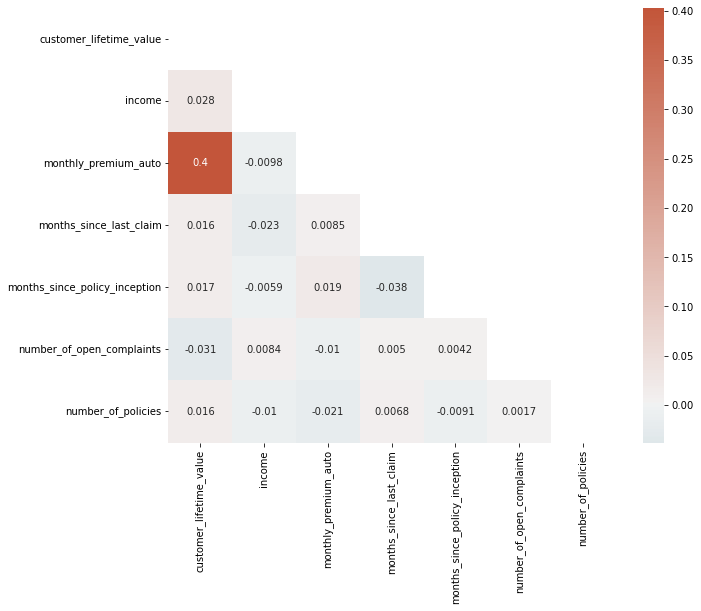

In [23]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True,);

## Pre-Processing Data

### Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

In [24]:
from scipy import stats
X_num[(np.abs(stats.zscore(X_num)) < 3).all(axis=1)]

# iqr=np.percentile(mca['customer_lifetime_value'],75)-np.percentile(mca['customer_lifetime_value'],25)
# upper_limit=np.percentile(mca['customer_lifetime_value'],75)+1.5*iqr
# lower_limit=np.percentile(mca['customer_lifetime_value'],25)-1.5*iqr

# #example only - I will use a new mca variable

# mca_exc_out= mca[(mca['customer_lifetime_value']>lower_limit)&(mca['customer_lifetime_value']<upper_limit)]


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...
10901,4547.892543,33531,116,11.0,15,0.0,1
10902,3579.023825,28304,91,10.0,30,2.0,1
10904,19228.463620,0,187,14.0,32,0.0,2
10906,5259.444853,61146,65,7.0,68,0.0,6


### Encoding Categorical Data fields using OHE.

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat) # drop first eliminate one of vriables, so by default are gonna be the rest
X_encoded=encoder.transform(X_cat).toarray()

In [26]:
X_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [27]:
X_dummies=pd.get_dummies(X_cat, drop_first=True)

In [28]:
X_dummies

,state_California,state_Nevada,state_Oregon,state_Unknown,state_Washington,response_Unknown,response_Yes,coverage_Extended,coverage_Premium,education_College,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_Unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_Unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


### Bring categorical and numerical columns back together using pd.concat.

In [29]:
X_final=pd.concat((X_num,X_dummies),axis=1)

In [60]:
X_final

,0,1,2,3,4,5,6,state_California,state_Nevada,state_Oregon,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_Unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_Unknown
0,0.109390,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.012419,0.000000,0.022222,0.085714,0.262626,0.0,0.000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.490358,0.221432,0.288889,0.971429,0.313131,0.0,0.125,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.767836,0.490873,0.266667,0.285714,0.030303,0.0,0.125,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.267803,0.236795,0.414815,0.400000,0.313131,0.0,0.750,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,1,0,0,0,1,0,0


### Define X and y, the y value you are seeking to predict is claim amount.

In [31]:
y
X=X_final

In [32]:
X.shape

(10910, 54)

In [33]:
y.shape

(10910,)

### Splitting into train set and test dataset using random state, eg 80%:20% .

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

### Apply linear regression model from sklearn.linear_model.

In [35]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

### Fit over your train data and predict against X test.

In [36]:
preds=lm.predict(X_test)
preds

array([482.56059604, 943.19288248, 385.05015397, ..., 597.16035792,
       505.64500273, 146.43581053])

## Model Validation

### You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.

In [37]:
r2_score(y_test,preds)

0.7711358136492281

In [38]:
mse=mean_squared_error(y_test, preds)
mse

19590.73439020427

In [39]:
rmse=np.sqrt(mse)
rmse

139.9669046246443

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

94.80594824742612

## Reporting

### Present results inside your notebook with appropriate annotation describing the accuracy of the model and business insight gained.

# DAY 2

## Pre-Processing Data

### Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

In [41]:
# iqr=np.percentile(mca['customer_lifetime_value'],75)-np.percentile(mca['customer_lifetime_value'],25)
# upper_limit=np.percentile(mca['customer_lifetime_value'],75)+1.5*iqr
# lower_limit=np.percentile(mca['customer_lifetime_value'],25)-1.5*iqr

# #example only - I will use a new mca variable

# mca_out= mca[(mca['customer_lifetime_value']>lower_limit)&(mca['customer_lifetime_value']<upper_limit)]

from scipy import stats
mca_out=X_num[(np.abs(stats.zscore(X_num)) < 3).all(axis=1)]

mca_out.reset_index(drop=True, inplace=True)

# from scipy import stats
# num_cols = list(mca.select_dtypes(include=np.number).columns)
# df_no_outliers = mca[(np.abs(stats.zscore(mca[num_cols])) < 3).all(axis=1)]
# mca_out=df_no_outliers.reset_index(drop=True, inplace=True)



X_num2=mca_out.select_dtypes(include=np.number)
X_cat2=mca_out.select_dtypes(include=object)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #optionally range 1-10
scaled=scaler.fit(X_num2)
scaled_X_num=scaled.transform(X_num2)
scaled_X_num_df=pd.DataFrame(scaled_X_num)
scaled_X_num_df


,0,1,2,3,4,5,6
0,0.109390,0.480381,0.000000,0.200000,0.525253,0.000000,1.000
1,0.012419,0.000000,0.022222,0.085714,0.262626,0.000000,0.000
2,0.490358,0.221432,0.288889,0.971429,0.313131,0.000000,0.125
3,0.767836,0.490873,0.266667,0.285714,0.030303,0.000000,0.125
4,0.267803,0.236795,0.414815,0.400000,0.313131,0.000000,0.750
...,...,...,...,...,...,...,...
10220,0.099571,0.335374,0.407407,0.314286,0.151515,0.000000,0.000
10221,0.063165,0.283094,0.222222,0.285714,0.303030,0.666667,0.000
10222,0.651202,0.000000,0.933333,0.400000,0.323232,0.000000,0.125
10223,0.126308,0.611576,0.029630,0.200000,0.686869,0.000000,0.625


### Encoding Categorical Data fields using OHE.

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat) # drop first eliminate one of vriables, so by default are gonna be the rest
X_encoded=encoder.transform(X_cat).toarray()
X_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [43]:
X_dummies=pd.get_dummies(X_cat, drop_first=True)

In [44]:
X_dummies

,state_California,state_Nevada,state_Oregon,state_Unknown,state_Washington,response_Unknown,response_Yes,coverage_Extended,coverage_Premium,education_College,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_Unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_Unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


### Bring categorical and numerical columns back together using pd.concat.

In [45]:
X_final=pd.concat((scaled_X_num_df,X_dummies),axis=1)

In [46]:
X_final

,0,1,2,3,4,5,6,state_California,state_Nevada,state_Oregon,...,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_Unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_Unknown
0,0.109390,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.012419,0.000000,0.022222,0.085714,0.262626,0.0,0.000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.490358,0.221432,0.288889,0.971429,0.313131,0.0,0.125,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.767836,0.490873,0.266667,0.285714,0.030303,0.0,0.125,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.267803,0.236795,0.414815,0.400000,0.313131,0.0,0.750,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,0,0,0,1,0,0,0,1,0,0


### Define X and y, the y value you are seeking to predict is claim amount.

In [47]:
y
X=X_final

In [48]:
X.shape

(10910, 54)

In [49]:
y.shape

(10910,)

### Splitting into train set and test dataset using random state, eg 80%:20% .

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

### Apply linear regression model from sklearn.linear_model.

In [51]:
lm=linear_model.LinearRegression() #configure model
model=lm.fit(X_train,y_train)

C:\Users\Sergi\anaconda3\envs\class\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Fit over your train data and predict against X test.

In [ ]:
preds=lm.predict(X_test)
preds

## Model Validation

### You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.

In [ ]:
r2_score(y_test,preds)

In [ ]:
mse=mean_squared_error(y_test, preds)
mse

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

## Reporting

### Present results inside your notebook with appropriate annotation describing the accuracy of the model and business insight gained.